In [ ]:
import numpy as np
import pandas as pd
import pickle

# Carga de datos

In [ ]:
# Cargo los datos de train
with open("C:/Users/Lenovo/Documents/GitHub/Datasets/Kaggle_Signals_ITBA/signals_train.pkl", 'rb') as f:
        lat=pickle.load(f)

In [ ]:
with open("C:/Users/Lenovo/Documents/GitHub/Datasets/Kaggle_Signals_ITBA/annotations_train.pkl", 'rb') as f:
        ann=pickle.load(f)

In [ ]:
with open("C:/Users/Lenovo/Documents/GitHub/Datasets/Kaggle_Signals_ITBA/patients_train.pkl", 'rb') as f:
        pat=pickle.load(f)

# print(type(lat))
#print(np.shape(lat))

# Aliviano el dataset

In [8]:
# Selecciono los indices de 2000 latidos (500 de cada tipo)

print('R')
r = []
for index, value in enumerate(ann):
    if ann[index]=='R':
        #print(f'{index}: {value}')
        r.append(index)
R = r[:500]
print(R)
print(len(R))


print('N')
n = []
for index, value in enumerate(ann):
    if ann[index]=='N':
        n.append(index)
N = n[:500]
print(N)
print(len(N))
        

print('A')
a = []
for index, value in enumerate(ann):
    if ann[index]=='A':
        a.append(index)
A = a[:500]
print(A)
print(len(A))
        

print('V')
v = []
for index, value in enumerate(ann):
    if ann[index]=='V':
        v.append(index)
V = v[:500]
print(V)
print(len(V))

T = R + N + A + V
print(T)
print(len(T))
        


R
[35035, 35036, 35037, 35038, 35039, 35040, 35041, 35042, 35043, 35044, 35045, 35046, 35047, 35048, 35049, 35050, 35051, 35052, 35053, 35054, 35055, 35056, 35057, 35058, 35059, 35060, 35061, 35062, 35063, 35064, 35065, 35066, 35067, 35068, 35069, 35070, 35071, 35072, 35073, 35074, 35075, 35076, 35077, 35078, 35079, 35080, 35081, 35082, 35083, 35084, 35085, 35086, 35087, 35088, 35089, 35090, 35091, 35092, 35093, 35094, 35095, 35096, 35097, 35098, 35099, 35100, 35101, 35102, 35103, 35104, 35105, 35106, 35107, 35108, 35109, 35110, 35111, 35112, 35113, 35114, 35115, 35116, 35117, 35118, 35119, 35120, 35121, 35122, 35123, 35124, 35125, 35126, 35127, 35128, 35129, 35130, 35131, 35132, 35133, 35134, 35135, 35136, 35137, 35138, 35139, 35140, 35141, 35142, 35143, 35144, 35145, 35146, 35147, 35148, 35149, 35150, 35151, 35152, 35153, 35154, 35155, 35156, 35157, 35158, 35159, 35160, 35161, 35162, 35163, 35164, 35165, 35166, 35167, 35168, 35169, 35170, 35171, 35172, 35173, 35174, 35175, 35176, 351

In [9]:
#print(type(lat))
#print(len(lat))
#print(type(lat[0]))
#print(len(lat[0]))
#print(type(lat[0][0]))
#print(len(lat[0][0]))
#print(type(lat[0][0][0]))
#print('>>>object of type numpy.float64 has no len()')
#print('\n')

In [10]:
lat1 = np.array(lat)
latidos = lat1[T]
print(latidos.shape)

(2000, 240, 12)


In [11]:
ann1 = np.array(ann)
notas = ann1[T]
print(notas.shape)

(2000,)


In [12]:
pat1 = np.array(pat)
paciente = pat1[T]
print(paciente.shape)

(2000,)


In [13]:
print(type(latidos))
print(len(latidos))
print(latidos[0][100])

<class 'numpy.ndarray'>
2000
[ 3.48425197  2.64566929 -0.18897638 -3.57874016  1.34645669  0.3976378
 -0.01968504 -0.88976378 -0.09055118 -6.37401575 -1.12992126  0.34251969]


In [14]:
l = len(latidos)
print(l)
latidos_final = []
for i in latidos:
    v = i[100:150]
    #print(np.shape(v))
    #print(type(v))
    latidos_final.append(v)

2000


In [15]:
print(np.shape(latidos_final))

(2000, 50, 12)


# Grafico Latidos al Azar

In [16]:
# Grafico el latido nro lat_idx
import numpy as np
from random import randint
import matplotlib.pyplot as plot
lat_idx=randint(0,len(latidos_final)) #randint(0,len(lat))
f, axarr = plot.subplots(12, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)
print("Latido nro: {}".format(lat_idx))
print("El latido es del tipo: {}".format(notas[lat_idx])) #format(ann[lat_idx]))
print("El latido pertence al paciente {}".format(paciente[lat_idx])) #format(pat[lat_idx]))
for i in range(12):
    axarr[i].plot(latidos_final[lat_idx].T[i]) #axarr[i].plot(lat[lat_idx].T[i])
plot.show()

Latido nro: 1485
El latido es del tipo: A
El latido pertence al paciente I22


<Figure size 1500x1500 with 12 Axes>

In [17]:
x = np.array(latidos_final)
print(x.shape)
y = np.array(notas)
print(y.shape)

(2000, 50, 12)
(2000,)


In [20]:
print(y)
# encode class values as integers

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
b = encoder.fit(y)
print(b)
print(b.classes_)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)
print(y)

['R' 'R' 'R' ..., 'V' 'V' 'V']


Using TensorFlow backend.


LabelEncoder()
['A' 'N' 'R' 'V']
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]]


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [22]:
print(x_train.shape)
print(y_train.shape)

(1800, 50, 12)
(1800, 4)


In [28]:
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
from helper import PlotLosses

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, name='Salida1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128, name='Salida2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax', name='Salida3'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 600)               0         
_________________________________________________________________
Salida1 (Dense)              (None, 512)               307712    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
Salida2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

In [29]:
Adam = optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
model.compile(loss = 'categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

In [30]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=20, x_val=x_valid, y_val_categorical=y_valid)
checkpointer = ModelCheckpoint(filepath='latidos.hdf5', verbose=1, save_best_only=True)

In [31]:
print(x_valid.shape)
print(y_valid.shape)

(200, 50, 12)
(200, 4)


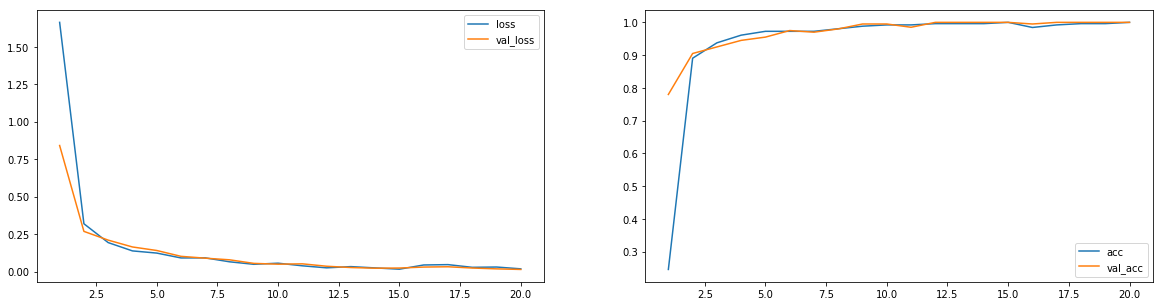


Epoch 00020: val_loss improved from 0.01478 to 0.01234, saving model to latidos.hdf5


In [32]:
batch_size = 256
epochs=20
model.fit(x_train, 
                       y_train,
                       epochs=epochs , batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_valid),
                       callbacks=[plot_losses, checkpointer],
                      )

In [49]:
loss, acc = model.evaluate(x_valid, y_valid, verbose=1)

200/200 [==============================] - 0s 1ms/step


In [50]:
print(acc)

1.0


In [ ]:
test_prediction = model3.predict(x_test)
test_labels = np.argmax(test_prediction, axis = 1)
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission-cnn.csv", sep=',',index=True,  index_label='Id')